### Problem Statement

__Predicting customer subscriptions to a term deposit based on the phone conversations with the customer and to improve success rate for calls made to customers.__

This is the call center data from a small startup providing machine learning solutions in the European banking market. The company is looking for ways to improve the success rate for calls made to customers for any product their clients offer. Towards this goal,they are looking for an ever evolving machine learning product that offers high success outcomes while offering interpretability for their clients to make informed decisions.

#### Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

__Attributes:__

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)


__Download Data:__ [here](https://drive.google.com/file/d/1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7)


#### Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

__Success Metric(s):__

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

__Bonus(es):__

- We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

- What makes the customers buy? Tell us which feature we should be focusing more on.



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import scikit-learn tools, grid search cross validation, and classifiers

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV,GridSearchCV, KFold
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# import Logistic Regression CV Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# import lazy predict
import lazypredict

from lazypredict.Supervised import LazyClassifier

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
# import Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

In [40]:
import imblearn
print(imblearn.__version__)
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

0.7.0


In [6]:
# load the dataset
marketing_data = pd.read_csv('term-deposit-marketing-2020.csv')
marketing_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [7]:
# rename some of the column for better understanding
marketing_data = marketing_data.rename(columns={'default': 'credit_default', 'balance': 'avg_yearly_balance', 'housing':'housing_loan', 'loan': 'personal_loan', 'campaign': 'no_of_contacts', 'y': 'client_subscribed'})
marketing_data.head()

,age,job,marital,education,credit_default,avg_yearly_balance,housing_loan,personal_loan,contact,day,month,duration,no_of_contacts,client_subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [8]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 40000 non-null  int64 
 1   job                 40000 non-null  object
 2   marital             40000 non-null  object
 3   education           40000 non-null  object
 4   credit_default      40000 non-null  object
 5   avg_yearly_balance  40000 non-null  int64 
 6   housing_loan        40000 non-null  object
 7   personal_loan       40000 non-null  object
 8   contact             40000 non-null  object
 9   day                 40000 non-null  int64 
 10  month               40000 non-null  object
 11  duration            40000 non-null  int64 
 12  no_of_contacts      40000 non-null  int64 
 13  client_subscribed   40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [9]:
marketing_data.describe()

,age,avg_yearly_balance,day,duration,no_of_contacts
count,40000.00,40000.00,40000.00,40000.00,40000.00
mean,40.54,1274.28,16.02,254.82,2.88
std,9.64,2903.77,8.28,259.37,3.24
min,19.00,-8019.00,1.00,0.00,1.00
25%,33.00,54.00,8.00,100.00,1.00
50%,39.00,407.00,17.00,175.00,2.00
75%,48.00,1319.00,21.00,313.00,3.00
max,95.00,102127.00,31.00,4918.00,63.00


### Exploratory Data Analysis

In [6]:
# Create a function for distribution plot
def count_plot_(column_name, dataset):
    ax = sns.countplot(x=column_name, data= dataset)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(dataset))),
            ha="center")
        ax.set_box_aspect(3/len(ax.patches))


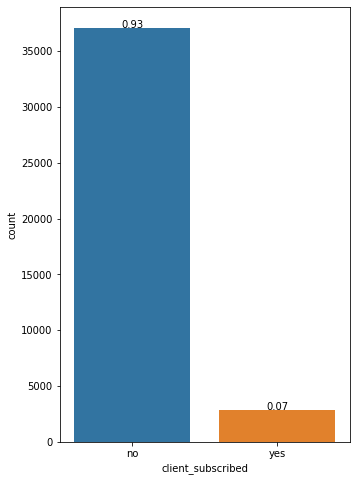

In [7]:
# Distribution of client subscription to term deposit
plt.figure(figsize=(8, 8))
count_plot_('client_subscribed', marketing_data)
plt.show()

__In the dataset only 7 % of customers subscribed to the term deposit. The dataset is highly imbalanced.__

In [8]:
# Create a function for distribution plot
def count_plot(column_name, dataset, x=0, y=0):
    ax = sns.countplot(x=column_name, data= dataset, ax = axes[x, y])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(dataset))),
            ha="center")
        ax.set_box_aspect(3/len(ax.patches))

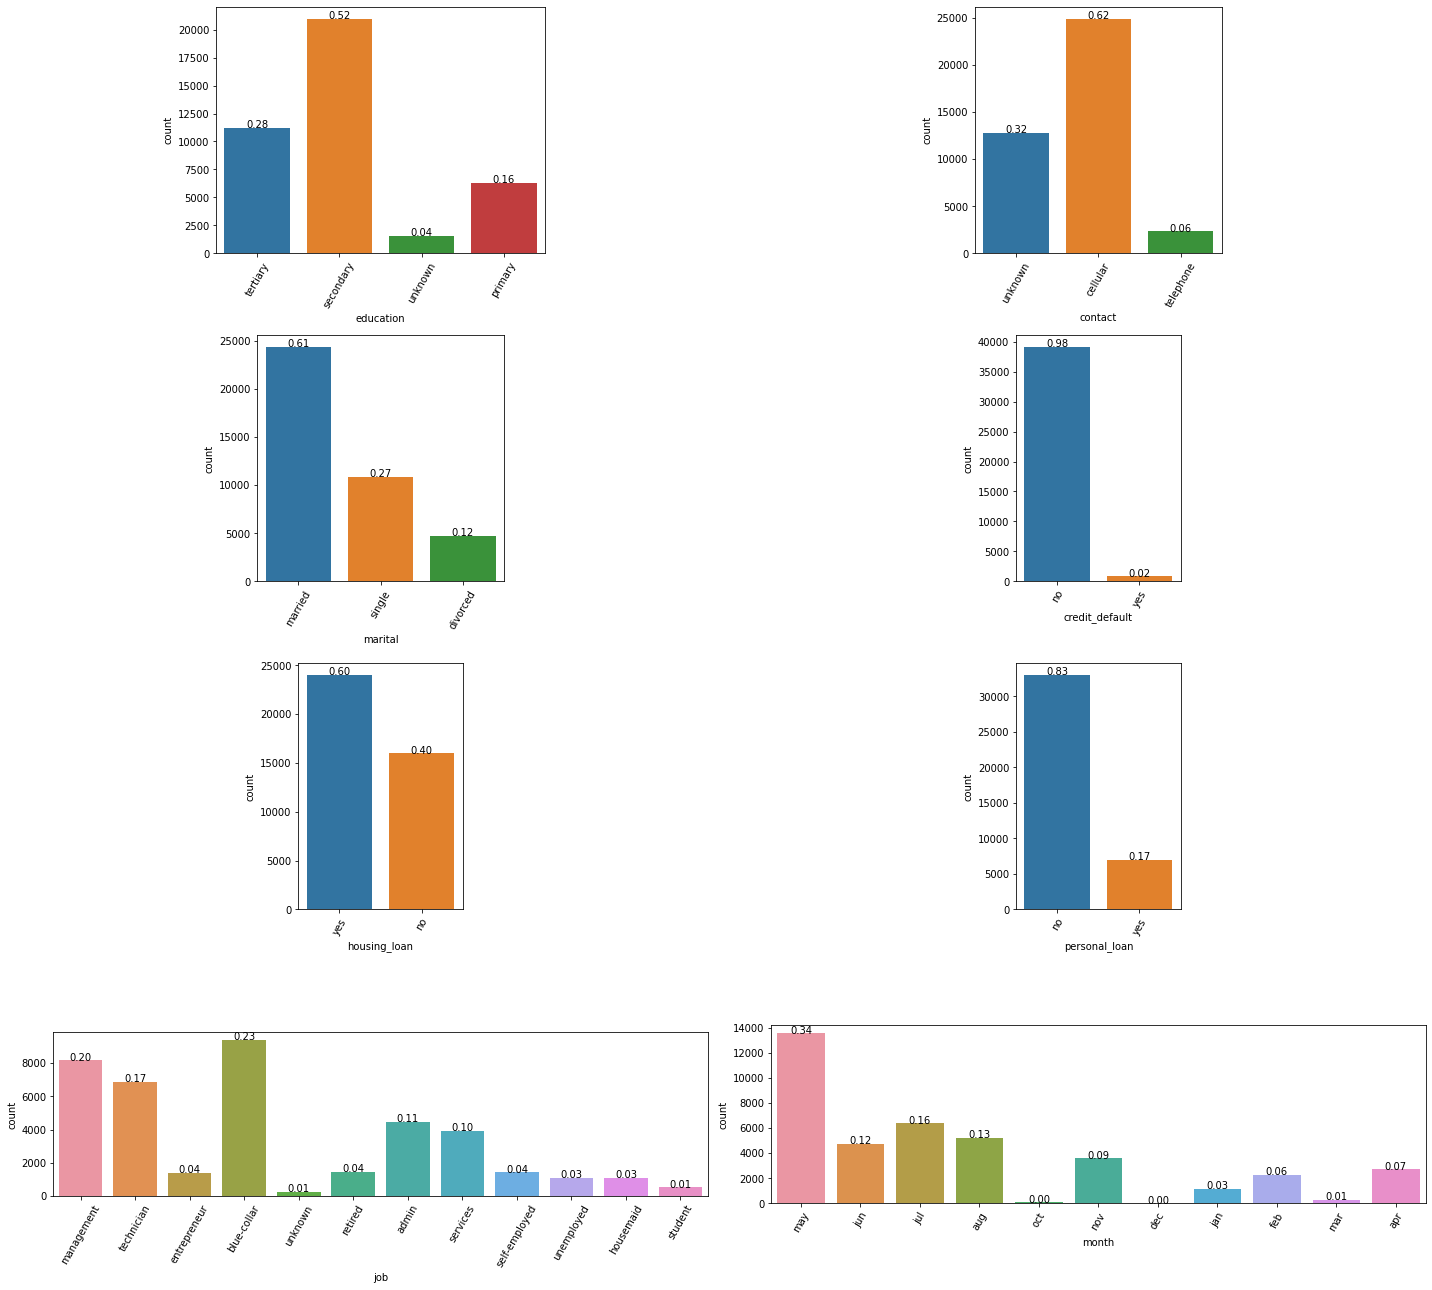

In [9]:
# Distribution of categorical variables
fig, axes =plt.subplots(4,2, figsize=(20, 18))
count_plot('education', marketing_data, x = 0, y= 0)
count_plot('contact', marketing_data, x =0, y= 1)
count_plot('marital', marketing_data, x = 1, y= 0)
count_plot('credit_default', marketing_data, x = 1, y= 1)
count_plot('housing_loan', marketing_data, x =2, y= 0)
count_plot('personal_loan', marketing_data, x = 2, y= 1)
count_plot('job', marketing_data,x = 3, y= 0 )
count_plot('month', marketing_data,x = 3, y= 1 )


plt.tight_layout()
plt.show()

From the distribution of the categorical variables
- About 50 % of the customers had secondary education and ~60% customers are married.
- Calls has been a\made to most of the customers who does not have any credit default. Only about 2% of the customers has credit default in this dataset.
- About 60% of the customers have housing load and 80% of customers don't have personal loan. So less calls were made to customers with personal loan.
- In this dataset most calls were made to blue-collar, management, technician job holders and least calls to students
- Most of the calls were made on the month of May which is the start month and it seems more calls were made in the begining and first 4 months of the plan and then it decreased. Least calls were made during the month of October. 
- Most of the call made from cell phones.

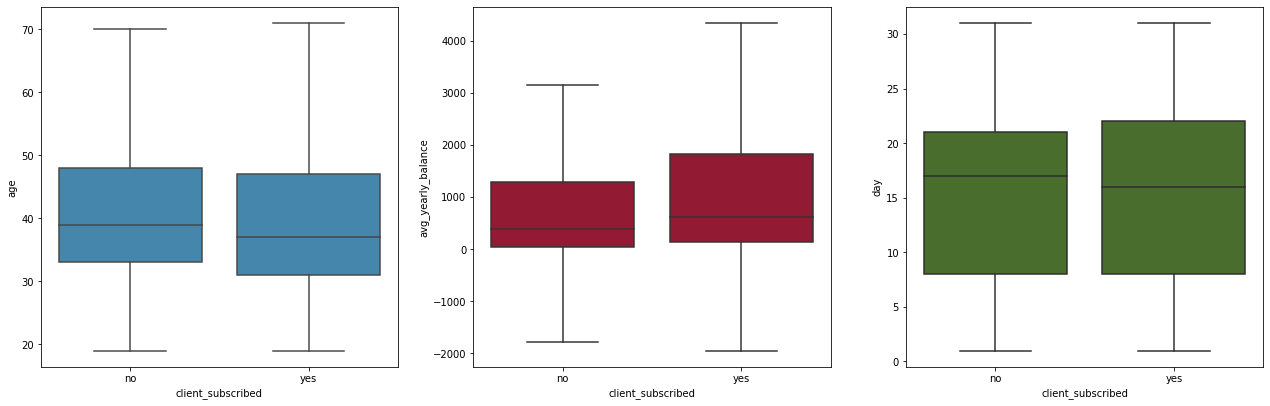

In [10]:
# Distribution of numerical variables w.r.t client_subscribed

plt.figure(figsize=(18, 6))
plt.subplot(1,3,1); sns.boxplot(x = 'client_subscribed', y = 'age', data = marketing_data, showfliers=False, color='#348ABD').set(xlabel= 'client_subscribed', ylabel='age')
plt.subplot(1,3,2); sns.boxplot(x = 'client_subscribed', y = 'avg_yearly_balance', data = marketing_data, showfliers=False, color='#A60628').set(xlabel= 'client_subscribed', ylabel='avg_yearly_balance')
plt.subplot(1,3,3);sns.boxplot(x = 'client_subscribed', y = 'day', data = marketing_data, showfliers=False, color='#467821').set(xlabel= 'client_subscribed', ylabel='day')

plt.tight_layout(pad=2)

- The average age of clients who subscribed is about 35 and their avrage salary is higher than the clients who are not subscribed.
- The day when the client has been contacted does not have any effect on whether the client subscribed or not.

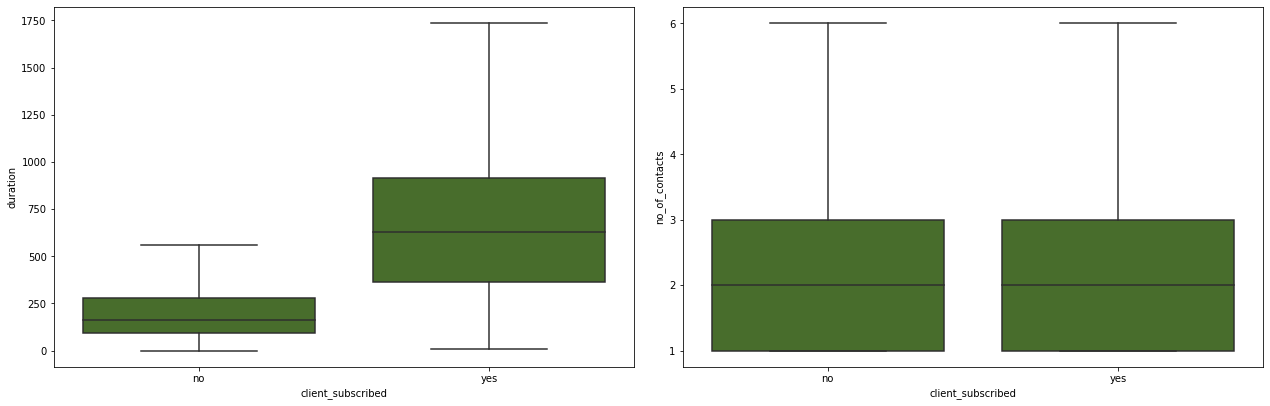

In [11]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1);sns.boxplot(x = 'client_subscribed', y = 'duration', data = marketing_data, showfliers=False, color='#467821').set(xlabel= 'client_subscribed', ylabel='duration')
plt.subplot(1,2,2);sns.boxplot(x = 'client_subscribed', y = 'no_of_contacts', data = marketing_data, showfliers=False, color='#467821').set(xlabel= 'client_subscribed', ylabel='no_of_contacts')
plt.tight_layout(pad=2)

- It seems the duration of call with the customer has large effect on whether the client subscribed or not.
- The clients who subscribed the term deposit plan had longer conversation with the agent. It might be the agent explained the plan very well so they got interested to know about it more and finally decided to subscribe.
- From this data it seems like number of contacts does not change the mind of a client to subscribe or not to the term deposit plan.

In [27]:
# define a function for the distribution of categorical variables w.r.t. client_subscribed
def count_plot_(column_name, dataset,hue, x=0, y=0):
    ax = sns.countplot(x=column_name, data= dataset,hue= hue, ax = axes[x, y])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/float(len(dataset))),
            ha="center")
        ax.set_box_aspect(3/len(ax.patches))

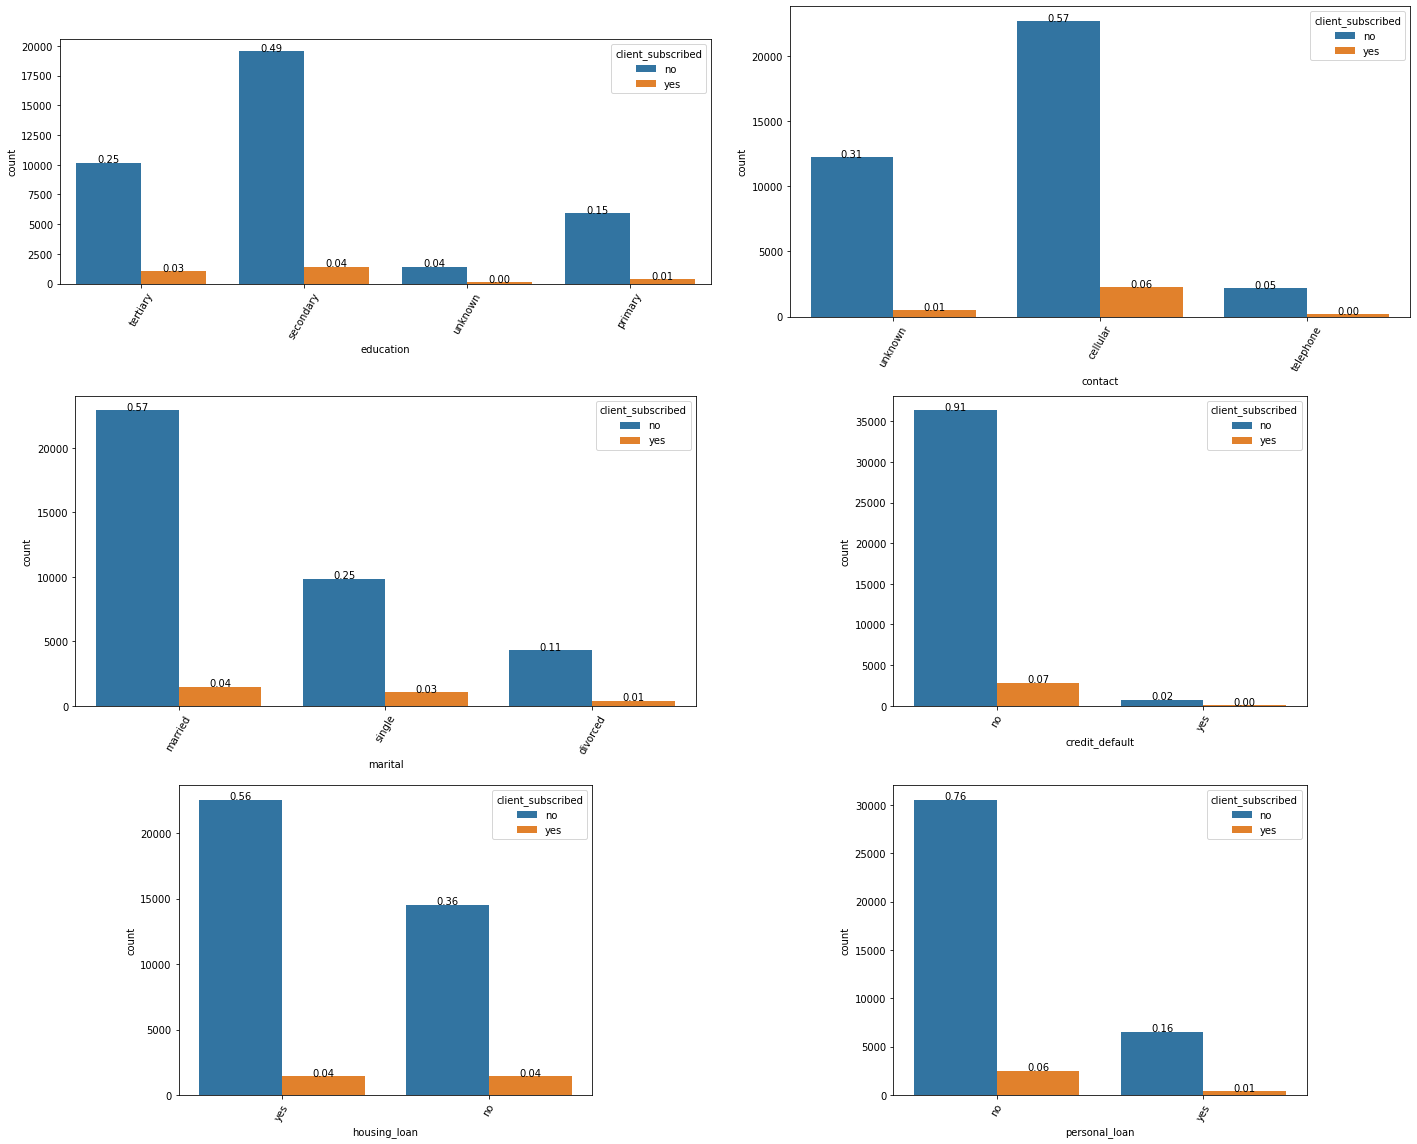

In [29]:
# Distribution of categorical variables w.r.t. client_subscribed
fig, axes =plt.subplots(3,2, figsize=(20, 16))
count_plot_('education', marketing_data,hue = marketing_data['client_subscribed'], x = 0, y= 0)
count_plot_('contact', marketing_data,hue = marketing_data['client_subscribed'], x =0, y= 1)
count_plot_('marital', marketing_data,hue = marketing_data['client_subscribed'], x = 1, y= 0)
count_plot_('credit_default', marketing_data,hue = marketing_data['client_subscribed'], x = 1, y= 1)
count_plot_('housing_loan', marketing_data,hue = marketing_data['client_subscribed'], x =2, y= 0)
count_plot_('personal_loan', marketing_data,hue = marketing_data['client_subscribed'], x = 2, y= 1)

plt.tight_layout()
plt.show()

## Machine Learning

From the EDA I saw there are no effect of day and no of contacts in the client subscription. so I will be removing these features from the dataset before doing the machine learning.

In [10]:
marketing_ml = marketing_data.drop(columns = ['day', 'no_of_contacts'])
marketing_ml.head()

,age,job,marital,education,credit_default,avg_yearly_balance,housing_loan,personal_loan,contact,month,duration,client_subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,no


In [11]:
# change the yes or no columns to 1 and 0 respectively
marketing_ml['credit_default'] = marketing_ml['credit_default'].apply(lambda x: 1 if x=='yes' else 0)
marketing_ml['housing_loan'] = marketing_ml['housing_loan'].apply(lambda x: 1 if x=='yes' else 0)
marketing_ml['personal_loan'] = marketing_ml['personal_loan'].apply(lambda x: 1 if x=='yes' else 0)
marketing_ml['client_subscribed'] = marketing_ml['client_subscribed'].apply(lambda x: 1 if x=='yes' else 0)
marketing_ml.head()

,age,job,marital,education,credit_default,avg_yearly_balance,housing_loan,personal_loan,contact,month,duration,client_subscribed
0,58,management,married,tertiary,0,2143,1,0,unknown,may,261,0
1,44,technician,single,secondary,0,29,1,0,unknown,may,151,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,may,76,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,may,92,0
4,33,unknown,single,unknown,0,1,0,0,unknown,may,198,0


In [12]:
# Lets convert the categorical variable to numeric before machine learning
subscription_ml = pd.get_dummies(data=marketing_ml, columns=['job', 'marital', 'education', 'contact', 'month'])
subscription_ml.info()                                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40000 non-null  int64
 1   credit_default       40000 non-null  int64
 2   avg_yearly_balance   40000 non-null  int64
 3   housing_loan         40000 non-null  int64
 4   personal_loan        40000 non-null  int64
 5   duration             40000 non-null  int64
 6   client_subscribed    40000 non-null  int64
 7   job_admin            40000 non-null  uint8
 8   job_blue-collar      40000 non-null  uint8
 9   job_entrepreneur     40000 non-null  uint8
 10  job_housemaid        40000 non-null  uint8
 11  job_management       40000 non-null  uint8
 12  job_retired          40000 non-null  uint8
 13  job_self-employed    40000 non-null  uint8
 14  job_services         40000 non-null  uint8
 15  job_student          40000 non-null  uint8
 16  job_technician       4

In [3]:
!pwd

/Users/pravatiswain/Documents/Apziva Projects/term_deposit_marketing


In [ ]:
!conda install package_name

### Modeling with LazyPredict

In [13]:
#set predictor variables and target variables
X = subscription_ml.drop(columns= ['client_subscribed'])
y = subscription_ml.client_subscribed

In [14]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Show the results of the split
print("X Training set sample size:", (X_train.shape[0]))
print("X Testing set sample size:", (X_test.shape[0]))
print("y Training set sample size:", (y_train.shape[0]))
print("y Testing set sample size:", (y_test.shape[0]))

X Training set sample size: 30000
X Testing set sample size: 10000
y Training set sample size: 30000
y Testing set sample size: 10000


In [51]:
# Using LazyPredict to built different model before hyperparameter tuning
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [17:32<00:00, 36.30s/it]   

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.88               0.83     0.83      0.90   
DecisionTreeClassifier             0.92               0.70     0.70      0.92   
LinearDiscriminantAnalysis         0.93               0.70     0.70      0.93   
PassiveAggressiveClassifier        0.91               0.69     0.69      0.91   
XGBClassifier                      0.93               0.68     0.68      0.93   
LGBMClassifier                     0.93               0.68     0.68      0.93   
BaggingClassifier                  0.93               0.66     0.66      0.92   
RandomForestClassifier             0.93               0.65     0.65      0.93   
LabelPropagation                   0.92               0.65     0.65      0.91   
LabelSpreading                     0.92               0.65     0.65      0.91   
ExtraTreeClassifier         

Based on the output of LazyPredict, I selected top 5 robust classifiers: XGB (powerful algorithm when speed and accuaracy are concerned), LGBM, KNN, Logistic Regression and Random Forest for this classification problem.

- eXtreme Gradient Boosting (XGBoost) is powerful algorithm when speed and accuaracy are concerned. It is powerful enough to deal with all short of irregularity in the dataset.

### Modeling with Random Forest, XGboost, LGBM, Logistic Regression and KNN with ScikitLearn

In [18]:
# defined a function to evaluate the model
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    y_test_pred_proba = model.predict_proba(X_test)[:,1]
    
    f1 = f1_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    roc= roc_auc_score(y_test, y_test_pred_proba)

    print("TRAINIG RESULTS: \n===============================")
    print(f"ACCURACY SCORE:{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print()
    print()

    print("TESTING RESULTS: \n===============================")
    print(f"ACCURACY SCORE:{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    
    print('F1-score: ' , round(f1,4))
    print("Best Score: " , round(model.best_score_,4))
    print("Test ROC AUC:", round(roc,4), '\n')
    print("Best Parameters: " , model.best_params_)
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr,tpr,label= 'f"{model}" ')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

### Logistic Regression Classifier

TRAINIG RESULTS: 
ACCURACY SCORE:0.6369
CONFUSION MATRIX:
[[16955 10866]
 [   26  2153]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     1.00    0.17      0.64       0.58          0.94
recall        0.61    0.99      0.64       0.80          0.64
f1-score      0.76    0.28      0.64       0.52          0.72
support   27821.00 2179.00      0.64   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.6308
CONFUSION MATRIX:
[[5602 3681]
 [  11  706]]
F1-score:  0.2766
Best Score:  0.9862
Test ROC AUC: 0.9262 

Best Parameters:  {'penalty': 'l2', 'C': 83.0}
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    1.00   0.16      0.63       0.58          0.94
recall       0.60   0.98      0.63       0.79          0.63
f1-score     0.75   0.28      0.63       0.51          0.72
support   9283.00 717.00      0.63   10000.00      10000.00


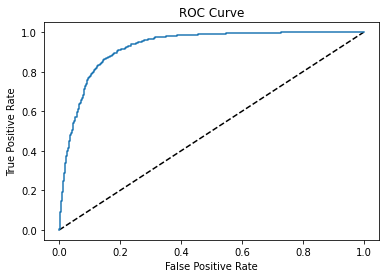

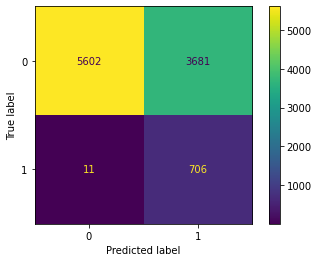

In [66]:
log_reg_params= {'penalty': ['l1','l2','elasticnet'], 'C':np.arange(0.5, 100.0, 0.5) }

log_reg = LogisticRegression(class_weight={0:0.01,1:0.99})
log_rcv = RandomizedSearchCV(log_reg,log_reg_params,cv=5, n_jobs=-1, scoring = 'recall')
log_rcv.fit(X_train, y_train)
evaluate(log_rcv, X_train, X_test, y_train, y_test)
plot_confusion_matrix(log_rcv, X_test, y_test)

### KNN Classifier

In [ ]:
knn=KNeighborsClassifier( n_neighbors=1)
knn_params = {'n_neighbors':[5,7,9],
          'leaf_size':[1,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
knn_rcv = RandomizedSearchCV(knn,knn_params,cv=5, n_jobs=-1, scoring = 'roc_auc',random_state = 42)
knn_rcv.fit(X_train, y_train)
evaluate(knn_rcv, X_train, X_test, y_train, y_test)
# plot confusion matrix
plot_confusion_matrix(knn_rcv, X_test, y_test)

### Random Forest Classifier

TRAINIG RESULTS: 
ACCURACY SCORE:0.9697
CONFUSION MATRIX:
[[27811    10]
 [  900  1279]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     0.97    0.99      0.97       0.98          0.97
recall        1.00    0.59      0.97       0.79          0.97
f1-score      0.98    0.74      0.97       0.86          0.97
support   27821.00 2179.00      0.97   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.9333
CONFUSION MATRIX:
[[9179  104]
 [ 563  154]]
F1-score:  0.3159
Best Score:  0.9408
Test ROC AUC: 0.9384 

Best Parameters:  {'n_estimators': 800, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy'}
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.94   0.60      0.93       0.77          0.92
recall       0.99   0.21      0.93       0.60          0.93
f1-score     0.96   0.32      0.93       0.64          0.92
support   9283.00 717.00      0.93   1

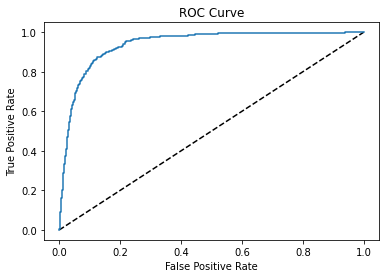

In [53]:
rf_params= { 'n_estimators': [500,600,800,1000,1500, 1800, 2000], 
             'max_features': ['auto', 'sqrt', 'log2'], 
             'max_depth' :  np.arange(4,20), 
             'criterion' :['gini', 'entropy'],
            'min_samples_split' : [2, 3, 4] }
rf = RandomForestClassifier()
rf_rcv = RandomizedSearchCV(rf,rf_params,cv=5, n_jobs=-1, scoring = 'roc_auc',random_state = 42)
rf_rcv.fit(X_train, y_train)
evaluate(rf_rcv, X_train, X_test, y_train, y_test)
# plot confusion matrix
plot_confusion_matrix(rf_rcv, X_test, y_test)

### XG Boost classifier

[10:29:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


TRAINIG RESULTS: 
ACCURACY SCORE:0.9598
CONFUSION MATRIX:
[[27577   244]
 [  961  1218]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     0.97    0.83      0.96       0.90          0.96
recall        0.99    0.56      0.96       0.78          0.96
f1-score      0.98    0.67      0.96       0.82          0.96
support   27821.00 2179.00      0.96   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.9339
CONFUSION MATRIX:
[[9077  206]
 [ 455  262]]
F1-score:  0.4422
Best Score:  0.9421
Test ROC AUC: 0.9406 

Best Parameters:  {'subsample': 0.9, 'silent': 1, 'objective': 'binary:log

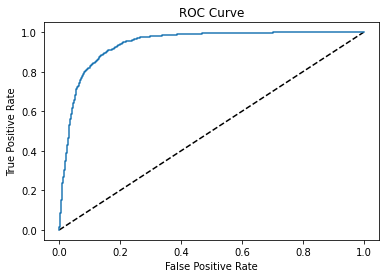

In [56]:
xgb_params= {'nthread':[10], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05],
              'max_depth': [4],
              'silent': [1],
              'subsample': [.6,.8,.9],
              'colsample_bytree':[.6,.75],
              'n_estimators': [1000]}
             
xgb = XGBClassifier()
xgb_rcv = RandomizedSearchCV(xgb,xgb_params,cv=5, n_jobs=-1, scoring = 'roc_auc',random_state = 42)
xgb_rcv.fit(X_train, y_train)
evaluate(xgb_rcv, X_train, X_test, y_train, y_test)
# plot confusion matrix
plot_confusion_matrix(xgb_rcv, X_test, y_test)

### LGBM Classifier

TRAINIG RESULTS: 
ACCURACY SCORE:0.9821
CONFUSION MATRIX:
[[27717   104]
 [  432  1747]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     0.98    0.94      0.98       0.96          0.98
recall        1.00    0.80      0.98       0.90          0.98
f1-score      0.99    0.87      0.98       0.93          0.98
support   27821.00 2179.00      0.98   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.9331
CONFUSION MATRIX:
[[9062  221]
 [ 448  269]]
F1-score:  0.4457
Best Score:  0.9386
Test ROC AUC: 0.9357 

Best Parameters:  {'num_leaves': 100, 'min_child_weight': 0.39}
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.95   0.55      0.93       0.75          0.92
recall       0.98   0.38      0.93       0.68          0.93
f1-score     0.96   0.45      0.93       0.71          0.93
support   9283.00 717.00      0.93   10000.00      10000.00


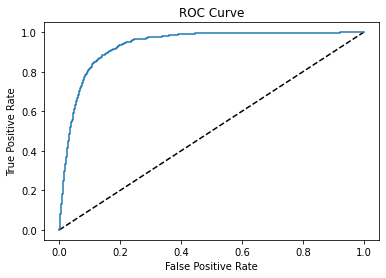

In [45]:
lgbm_params = {'num_leaves': np.arange(100,500,100),
               'min_child_weight': np.arange(0.01,1,0.01)}        
lgbm = LGBMClassifier()
lgbm_rcv = RandomizedSearchCV(lgbm,lgbm_params, cv=5, n_jobs=-1, scoring = 'roc_auc',random_state = 42)
lgbm_rcv.fit(X_train, y_train)
evaluate(lgbm_rcv, X_train, X_test, y_train, y_test)
# plot confusion matrix
plot_confusion_matrix(lgbm_rcv, X_test, y_test)

From the model performance we find all of the three models have high ROC_AUC score of about .94. Besed on the F1 score LGBM classifier shows best performance.

### Recursive Feature Elimination
Based on the RFE ranking of the features I will remove the lowest ranked features from the dataset and do the modeling again to further improve the performance.

In [46]:
# feature extraction, lgbm

rfe = RFE(lgbm, 10)
fit = rfe.fit(X_train, y_train)

#the best features according to RFE have a ranking of 1, so we will create a second model with those features.

selected_features = pd.DataFrame({'Feature':list(X.columns),'Ranking':fit.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
0,age,1
36,month_may,1
33,month_jul,1
27,contact_unknown,1
23,education_tertiary,1
37,month_nov,1
19,marital_married,1
2,avg_yearly_balance,1
3,housing_loan,1
5,duration,1


In [48]:
# droped the features starting from rank 30 to rank 24 from train and test set to see how the model peforms 
X_train_rfe = X_train.drop(columns=['month_dec', 'job_retired', 'job_unknown', 'job_self-employed', 'job_student', 'job_entrepreneur', 'job_unemployed'])
X_test_rfe = X_test.drop(columns=['month_dec', 'job_retired', 'job_unknown', 'job_self-employed', 'job_student', 'job_entrepreneur', 'job_unemployed'])

## Addressing Imbalanced Dataset

- __Synthetic Minority Oversampling Technique (SMOTE)__
- __Random Oversample__
- __Random Undersample__
- __Combining Random Oversampling and Undersampling__


In [16]:
# summarize class distribution in the term subscription dataset
counter = Counter(y)
print(counter)

Counter({0: 37104, 1: 2896})


In the dataset 37104 customers did not subscribed (majority class) and 2896 customers subscribed (minority class)

### SMOTE for Random Forest Calssifier

In [36]:
# Standardizing the splits to get consistent results (CV= 5/10 we get different results each time)
kf = KFold(n_splits=5, random_state=42, shuffle=False)

In [25]:
rf_params_smote = { 'rf__n_estimators': [500,600,800,1000,1500, 1800, 2000], 
             'rf__max_features': ['auto', 'sqrt', 'log2'], 
             'rf__max_depth' :  np.arange(4,20), 
             'rf__criterion' :['gini', 'entropy'],
            'rf__min_samples_split' : [2, 3, 4] }


# define pipeline
pipeline = Pipeline([("smote", SMOTE()), ("rf", RandomForestClassifier())])


In [26]:
# smote to the training folds, and not to the validation fold
rf_rcv_smote = RandomizedSearchCV(pipeline, rf_params, scoring='f1', n_jobs=-1, cv=kf).fit(X_train, y_train)



TRAINIG RESULTS: 
ACCURACY SCORE:0.9507
CONFUSION MATRIX:
[[26941   880]
 [  599  1580]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     0.98    0.64      0.95       0.81          0.95
recall        0.97    0.73      0.95       0.85          0.95
f1-score      0.97    0.68      0.95       0.83          0.95
support   27821.00 2179.00      0.95   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.9273
CONFUSION MATRIX:
[[8879  404]
 [ 323  394]]
F1-score:  0.5201
Best Score:  0.4978
Test ROC AUC: 0.9237 

Best Parameters:  {'rf__n_estimators': 1800, 'rf__min_samples_split': 2, 'rf__max_features': 'sqrt', 'rf__max_depth': 11, 'rf__criterion': 'gini'}
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.96   0.49      0.93       0.73          0.93
recall       0.96   0.55      0.93       0.75          0.93
f1-score     0.96   0.52      0.93       0.74          0.93
support   9283.00 71

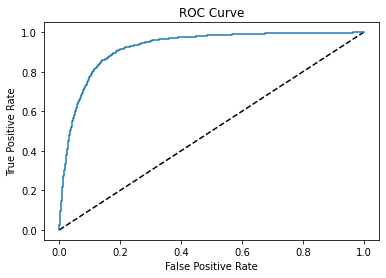

In [27]:
# model evaluation 
evaluate(rf_rcv_smote, X_train, X_test, y_train, y_test)

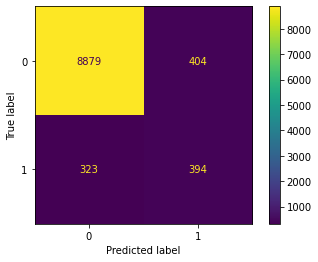

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_rcv_smote, X_test, y_test)

### SMOTE for Logistic Regression Calssifier

TRAINIG RESULTS: 
ACCURACY SCORE:0.5263
CONFUSION MATRIX:
[[13650 14171]
 [   40  2139]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     1.00    0.13      0.53       0.56          0.93
recall        0.49    0.98      0.53       0.74          0.53
f1-score      0.66    0.23      0.53       0.44          0.63
support   27821.00 2179.00      0.53   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.5257
CONFUSION MATRIX:
[[4553 4730]
 [  13  704]]
F1-score:  0.2289
Best Score:  0.2678
Test ROC AUC: 0.9046 

Best Parameters:  {'log__penalty': 'l2', 'log__C': 83.0}
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    1.00   0.13      0.53       0.56          0.93
recall       0.49   0.98      0.53       0.74          0.53
f1-score     0.66   0.23      0.53       0.44          0.63
support   9283.00 717.00      0.53   10000.00      10000.00


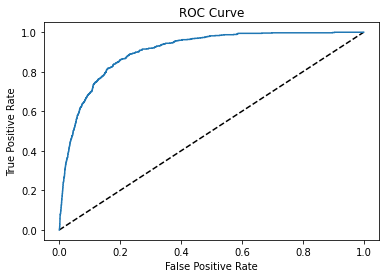

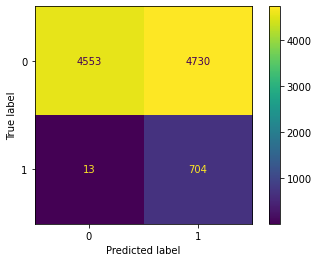

In [65]:
# Standardizing the splits to get consistent results (CV= 5/10 we get different results each time)
kf = KFold(n_splits=5, random_state=42, shuffle=False)
# define parameters
log_params_smote= {'log__penalty': ['l1','l2','elasticnet'], 'log__C':np.arange(0.5, 100.0, 0.5) }

log_reg_smote = LogisticRegression(class_weight={0:0.01,1:0.99})
# define pipeline
pipeline_log = Pipeline([("smote", SMOTE()), ("log", log_reg)])
# smote to the training folds, and not to the validation fold
log_rcv_smote = RandomizedSearchCV(pipeline_log, log_params_smote, scoring='f1', n_jobs=-1, cv=kf).fit(X_train, y_train)

# model evaluation 
evaluate(log_rcv_smote, X_train, X_test, y_train, y_test)0
plot_confusion_matrix(log_rcv_smote, X_test, y_test)

### SMOTE for LGBM Calssifier

TRAINIG RESULTS: 
ACCURACY SCORE:0.9605
CONFUSION MATRIX:
[[26635  1186]
 [    0  2179]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     1.00    0.65      0.96       0.82          0.97
recall        0.96    1.00      0.96       0.98          0.96
f1-score      0.98    0.79      0.96       0.88          0.96
support   27821.00 2179.00      0.96   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.9052
CONFUSION MATRIX:
[[8518  765]
 [ 183  534]]
F1-score:  0.5298
Best Score:  0.5261
Test ROC AUC: 0.929 

Best Parameters:  {'lgbm__num_leaves': 400, 'lgbm__min_child_weight': 0.06999999999999999}
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.98   0.41      0.91       0.70          0.94
recall       0.92   0.74      0.91       0.83          0.91
f1-score     0.95   0.53      0.91       0.74          0.92
support   9283.00 717.00      0.91   10000.00      10000.00


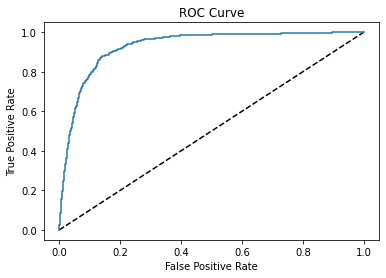

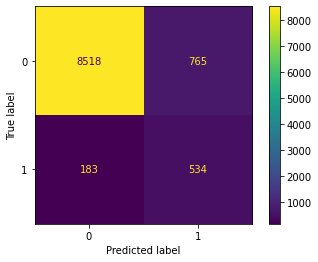

In [75]:
# Standardizing the splits to get consistent results (CV= 5/10 we get different results each time)
kf = KFold(n_splits=5, random_state=42, shuffle=False)

# define lgbm parameters
lgbm_params_smote = {'lgbm__num_leaves': np.arange(100,500,100),
               'lgbm__min_child_weight': np.arange(0.01,1,0.01)}   

# define pipeline
pipeline_lgbm = Pipeline([("smote", SMOTE()), ("lgbm", LGBMClassifier(class_weight={0:0.01,1:0.99}))])
# smote to the training folds, and not to the validation fold
lgbm_rcv_smote = RandomizedSearchCV(pipeline_lgbm, lgbm_params_smote, scoring='f1', n_jobs=-1, cv=kf).fit(X_train, y_train)

# model evaluation 
evaluate(lgbm_rcv_smote, X_train, X_test, y_train, y_test)
# plot confusion matrix
plot_confusion_matrix(lgbm_rcv_smote, X_test, y_test)

### SMOTE for XGB Calssifier

### Random Oversampling

TRAINIG RESULTS: 
ACCURACY SCORE:0.9382
CONFUSION MATRIX:
[[25969  1852]
 [    1  2178]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     1.00    0.54      0.94       0.77          0.97
recall        0.93    1.00      0.94       0.97          0.94
f1-score      0.97    0.70      0.94       0.83          0.95
support   27821.00 2179.00      0.94   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.9009
CONFUSION MATRIX:
[[8467  816]
 [ 175  542]]
F1-score:  0.5224
Best Score:  0.5348
Test ROC AUC: 0.9342 

Best Parameters:  {'lgbm__num_leaves': 100, 'lgbm__min_child_weight': 0.45}
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.98   0.40      0.90       0.69          0.94
recall       0.91   0.76      0.90       0.83          0.90
f1-score     0.94   0.52      0.90       0.73          0.91
support   9283.00 717.00      0.90   10000.00      10000.00


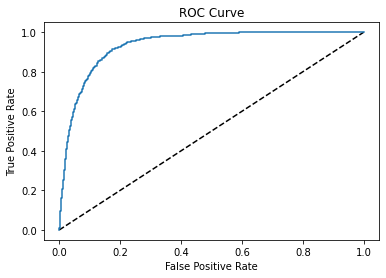

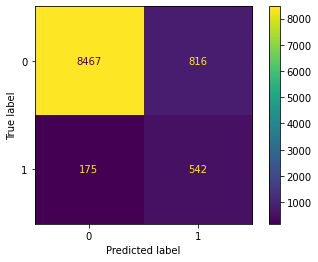

In [51]:
# define pipeline
pipeline_lgbm_over = Pipeline([('over', RandomOverSampler()), ("lgbm", LGBMClassifier())])
# smote to the training folds, and not to the validation fold
lgbm_rcv_over = RandomizedSearchCV(pipeline_lgbm_over, lgbm_params_smote, scoring='f1', n_jobs=-1, cv=kf).fit(X_train_rfe, y_train)

# model evaluation 
evaluate(lgbm_rcv_over, X_train_rfe, X_test_rfe, y_train, y_test)
# plot confusion matrix
plot_confusion_matrix(lgbm_rcv_over, X_test_rfe, y_test)

### Random Undersampling

TRAINIG RESULTS: 
ACCURACY SCORE:0.8636
CONFUSION MATRIX:
[[23730  4091]
 [    0  2179]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     1.00    0.35      0.86       0.67          0.95
recall        0.85    1.00      0.86       0.93          0.86
f1-score      0.92    0.52      0.86       0.72          0.89
support   27821.00 2179.00      0.86   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.8442
CONFUSION MATRIX:
[[7803 1480]
 [  78  639]]
F1-score:  0.4506
Best Score:  0.4685
Test ROC AUC: 0.9299 

Best Parameters:  {'lgbm__num_leaves': 200, 'lgbm__min_child_weight': 0.76}
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.99   0.30      0.84       0.65          0.94
recall       0.84   0.89      0.84       0.87          0.84
f1-score     0.91   0.45      0.84       0.68          0.88
support   9283.00 717.00      0.84   10000.00      10000.00


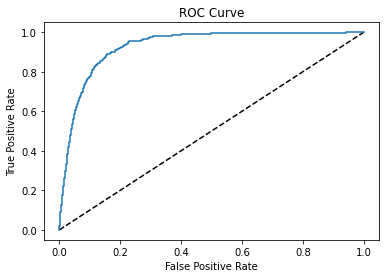

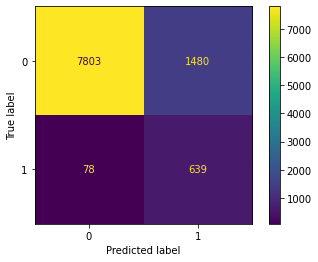

In [50]:
# define pipeline
pipeline_lgbm_under = Pipeline([('under', RandomUnderSampler()), ("lgbm", LGBMClassifier())])
# smote to the training folds, and not to the validation fold
lgbm_rcv_under = RandomizedSearchCV(pipeline_lgbm_under, lgbm_params_smote, scoring='f1', n_jobs=-1, cv=kf).fit(X_train_rfe, y_train)

# model evaluation 
evaluate(lgbm_rcv_under, X_train_rfe, X_test_rfe, y_train, y_test)
# plot confusion matrix
plot_confusion_matrix(lgbm_rcv_under, X_test_rfe, y_test)

### Combining both Oversampling and Undersampling 

TRAINIG RESULTS: 
ACCURACY SCORE:0.9307
CONFUSION MATRIX:
[[25743  2078]
 [    0  2179]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     1.00    0.51      0.93       0.76          0.96
recall        0.93    1.00      0.93       0.96          0.93
f1-score      0.96    0.68      0.93       0.82          0.94
support   27821.00 2179.00      0.93   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.8978
CONFUSION MATRIX:
[[8428  855]
 [ 167  550]]
F1-score:  0.5184
Best Score:  0.5245
Test ROC AUC: 0.9315 

Best Parameters:  {'lgbm__num_leaves': 400, 'lgbm__min_child_weight': 0.54}
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.98   0.39      0.90       0.69          0.94
recall       0.91   0.77      0.90       0.84          0.90
f1-score     0.94   0.52      0.90       0.73          0.91
support   9283.00 717.00      0.90   10000.00      10000.00


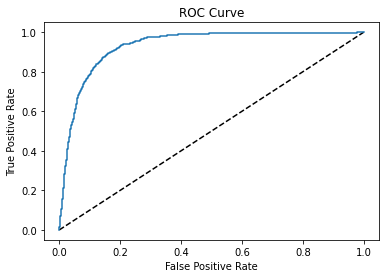

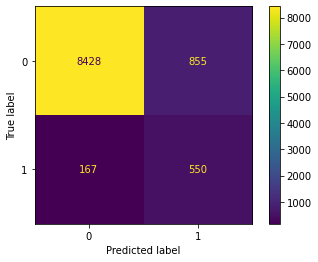

In [42]:
# oversampling applied to minority class with sampling_strategy set to 0.1 (10%) and undersampling with sampling_strategy set to 0.5 (50%)
# define pipeline
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# define pipeline
pipeline_lgbm_combine = Pipeline([('o', over), ('u', under), ("lgbm", LGBMClassifier())])
# smote to the training folds, and not to the validation fold
lgbm_rcv_combine = RandomizedSearchCV(pipeline_lgbm_combine, lgbm_params_smote, scoring='f1', n_jobs=-1, cv=kf).fit(X_train, y_train)

# model evaluation 
evaluate(lgbm_rcv_combine, X_train, X_test, y_train, y_test)
# plot confusion matrix
plot_confusion_matrix(lgbm_rcv_combine, X_test, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE:0.9537
CONFUSION MATRIX:
[[26431  1390]
 [    0  2179]]
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision     1.00    0.61      0.95       0.81          0.97
recall        0.95    1.00      0.95       0.98          0.95
f1-score      0.97    0.76      0.95       0.87          0.96
support   27821.00 2179.00      0.95   30000.00      30000.00


TESTING RESULTS: 
ACCURACY SCORE:0.9065
CONFUSION MATRIX:
[[8528  755]
 [ 180  537]]
F1-score:  0.5346
Best Score:  0.5301
Test ROC AUC: 0.9307 

Best Parameters:  {'lgbm__num_leaves': 300, 'lgbm__min_child_weight': 0.18000000000000002}
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.98   0.42      0.91       0.70          0.94
recall       0.92   0.75      0.91       0.83          0.91
f1-score     0.95   0.53      0.91       0.74          0.92
support   9283.00 717.00      0.91   10000.00      10000.00


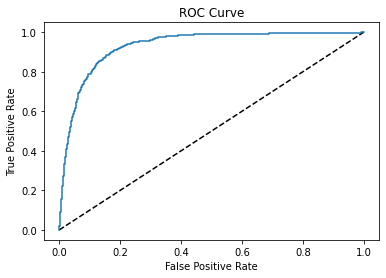

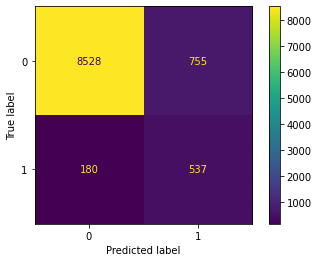

In [73]:
# Standardizing the splits to get consistent results (CV= 5/10 we get different results each time)
kf = KFold(n_splits=5, random_state=42, shuffle=False)

# define lgbm parameters
lgbm_params_smote = {'lgbm__num_leaves': np.arange(100,500,100),
               'lgbm__min_child_weight': np.arange(0.01,1,0.01)}   

# define pipeline
pipeline_lgbm = Pipeline([("smote", SMOTE()), ("lgbm", LGBMClassifier(class_weight={0:0.02,1:0.98}))])
# smote to the training folds, and not to the validation fold
lgbm_rcv_smote = RandomizedSearchCV(pipeline_lgbm, lgbm_params_smote, scoring='f1', n_jobs=-1, cv=kf).fit(X_train, y_train)

# model evaluation 
evaluate(lgbm_rcv_smote, X_train, X_test, y_train, y_test)
# plot confusion matrix
plot_confusion_matrix(lgbm_rcv_smote, X_test, y_test)

### Feature Importance

In [55]:
# Instantiate and fit the lgbm model. 
lgbm_feature = LGBMClassifier().fit(X_train, y_train) 

# Explore feature importances
feature_importances = pd.DataFrame(lgbm_feature.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
# Print sorted list of feature importances
feature_importances

,importance
duration,670
avg_yearly_balance,609
age,470
housing_loan,90
month_may,82
contact_unknown,77
month_nov,66
month_jul,62
month_aug,60
education_tertiary,54


## Conclusion:

This is a supervised machine learning classification algorithms to predict if a customer will subscribe to the term deposit or not. From the EDA, I saw only 7 % of customers who subscribed to the term deposit and 93% of customers didn't subscribe. So the dataset is highly imbalanced. The customers who subscribed are the minority class and the customers who didn't subscribe are the majority class.

I build classification models to predict which customers will subscribe the plan, so our goal is to predict the minority class. I used the LazyPredict library to build different models. Based on the LazyClassifier output, I selected 5 classifiers for this classification problem: Logistic Regression,Random Forest, XGBoost, LGBM,and KNN classifiers. I did feature selection using Recursive Feature Selection (RFE). Based on the RFE feature ranking, I removed the some of the low ranking features from the training data and train the model.

To address the imbalanced classification problem I used SMOTE, Random Oversampling and Under sampling and combination of both Oversampling and Undersampling. However my prediction for minority class was not very good.To further improve the minority class prediction I added class_weight to the models. Based on the confusion matrix of the Logistic regression classifier instead of 10,000 call we only have to call 5270 customers and among them 704 customers will subscribe to the term deposit. The model is mispredicting only 13 customers as subscribers. 

The four most important features in this dataset are 'duration', 'avg_yearly_balance', 'age', 'housing_loan'. The feature 'duration has highest importance value. The customers who are interested about the plan might have talked about the plan for longer time. The customers who has higher average yearly balance are more likely to subscribe the plan.



Calculate no. of total call duration, before 10,000 calls in the test set. average call duration 3 minutes, able to reduce to call duration from ...